In [5]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles

In [6]:
df_meto = pd.read_csv('export-tokenholders-for-contract-meto.csv')
df_wear = pd.read_csv('export-tokenholders-for-contract-wear.csv')

df_meto_trans = pd.read_csv('meto transfer.csv')
df_wear_trans = pd.read_csv('wear transfer.csv')
df_intersect = pd.read_csv('intersection_wear_meto.csv')

In [14]:
def intersect_of_to(df1, df2, df_intersect, df_tr1, df_tr2, colname, token_name1, token_name2):
    unique_1 = [a for a in list(df1[colname]) if a not in list(df_intersect[colname])]
    unique_2 = [a for a in list(df2[colname]) if a not in list(df_intersect[colname])]
    unique_intersect = list(df_intersect[colname])
    
    from_1 = [a for a in df_tr1['From'] if a in unique_1]
    from_2 = [a for a in df_tr2['From'] if a in unique_2]
    from_intersect = [a for a in df_tr1['From'] if a in unique_intersect] + [a for a in df_tr2['From'] if a in unique_intersect]
    
    to_1, to_2, intersect_to = [], [], []

    for x in from_1:
        to_1.append(list(df_tr1.loc[df_tr1['From'] == x]['To']))
    
    for x in from_2:
        to_2.append(list(df_tr2.loc[df_tr2['From'] == x]['To']))
    
    for x in from_intersect:
        intersect_to.append(list(df_tr1.loc[df_tr1['From'] == x]['To']))
        intersect_to.append(list(df_tr2.loc[df_tr2['From'] == x]['To']))
        
    storage_1, storage_2, storage_3 = [], [], []

    for x in range(len(to_1)):
        storage_1.extend(to_1[x])
    
    for x in range(len(to_2)):
            storage_2.extend(to_2[x])
            
    for x in range(len(intersect_to)):
            storage_2.extend(intersect_to[x])
            
    nd_storage_1 = list(set(storage_1))
    nd_storage_2 = list(set(storage_2))
    nd_storage_3 = list(set(storage_3))
    
    df11 = pd.DataFrame({colname:nd_storage_1})
    df22 = pd.DataFrame({colname:nd_storage_2})
    df33 = pd.DataFrame({colname:nd_storage_3})
    df10 = df11.append([df33, df22])

    venn3([set(nd_storage_1), set(nd_storage_2), set(nd_storage_3)],
           (token_name1, token_name2),
            set_colors=("red","gray",'green'))
    plt.savefig('intersection', dpi=150, facecolor='w', orientation='portrait', 
                papertype='ledger', transparent=False, pad_inches=0.5, frameon=True)
    plt.title(f"Intersection of {token_name1}, {token_name2} and intersect by 'To'")
    plt.show()
    
    return df10[df10[colname].duplicated()].reset_index(drop=True)[[colname]]

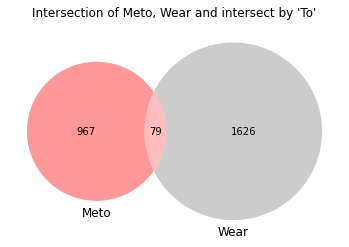

,HolderAddress
0,0xcc8cd14a1f7df6e7044316d17efe3f5dc4038185
1,0x2c7a17c4a5d0861fc076bb1b96f3aeee403cb7c2
2,0x2b127dab7233ecd0a47aa7485edb417bc779b56d
3,0xfe0f130512e5f24e3a1efa1c6b1fb73be104cd68
4,0xb20b17a146d0ceaaaec707a3703d790139f747bf
...,...
74,0x59699cdbf6519042d6074fdbe2408ad993435bd8
75,0x644331d23ccf4950dde32c88eebdf4ce9415c169
76,0x9f3d36ca325a3d6b526b1043ccbfd339a9a59610
77,0xbae59f3dd798545a71487e9e0fad6e96f66199d8


In [15]:
intersect_of_to(df_meto, df_wear, df_intersect, df_meto_trans, df_wear_trans, 'HolderAddress', 'Meto','Wear')

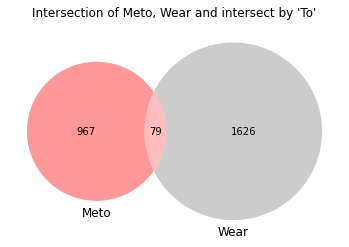

In [16]:
df = intersect_of_to(df_meto, df_wear, df_intersect, df_meto_trans, df_wear_trans, 'HolderAddress', 'Meto','Wear')
df.to_csv('intersection_by_to_all.csv')